In [73]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import requests
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
import math
import random
from scipy.optimize import minimize

In [74]:
df = pd.read_csv("country_wise_latest.csv")
df.head(20)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
7,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific
9,Austria,20558,713,18246,1599,86,1,37,3.47,88.75,3.91,19743,815,4.13,Europe


In [75]:
corona_cases_per_day = df.groupby(
    ["Country/Region"])['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
sorted_By_Confirmed1 = corona_cases_per_day.sort_values(
    'Country/Region', ascending=False)

sorted_By_Confirmed1.style.background_gradient(cmap='Reds')

/tmp/ipykernel_305/3362612382.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  corona_cases_per_day = df.groupby(


,Country/Region,Confirmed,Deaths,Recovered
186,Zimbabwe,2704,36,542
185,Zambia,4552,140,2815
184,Yemen,1691,483,833
183,Western Sahara,10,1,8
182,West Bank and Gaza,10621,78,3752
181,Vietnam,431,0,365
180,Venezuela,15988,146,9959
179,Uzbekistan,21209,121,11674
178,Uruguay,1202,35,951
177,United Kingdom,301708,45844,1437


7
2989751.718494698 117268.04185284242
     
q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
q_4: 
     
q_5: 
     
q_6: 
     
q_7: 
      [8.57656943e-03 1.15416978e-03 6.61589986e-03 2.14514753e-04
 2.24684691e-04 2.03398773e-05 3.95955919e-02 8.84311643e-03
 3.61931561e-03 4.86217672e-03 7.20078959e-03 9.03468969e-05
 9.33789577e-03 5.35045203e-02 2.60161222e-05 1.59055476e-02
 1.57108997e-02 1.13524897e-05 4.18623057e-04 2.34145099e-05
 1.68350326e-02 2.48288409e-03 1.74781039e-04 5.77646603e-01
 3.33479384e-05 2.51197485e-03 2.60161222e-04 8.27785705e-05
 8.94008561e-05 5.50595749e-04 5.34513055e-05 4.04668955e-03
 2.75435050e-02 1.08771042e-03 2.18062406e-04 8.22873388e-02
 2.05250648e-02 6.08070093e-02 8.37246113e-05 7.56832645e-04
 2.09169622e-03 3.74655810e-03 3.70256720e-03 1.15440629e-03
 5.98843830e-04 2.50700814e-04 3.66969229e-03 3.25461688e-03
 1.19650511e-03 4.25718363e-06 1.51735485e-02 1.91954045e-02
 2.18729364e-02 3.55593088e-03 7.26322829e-04 6.26752034e-05
 4.81

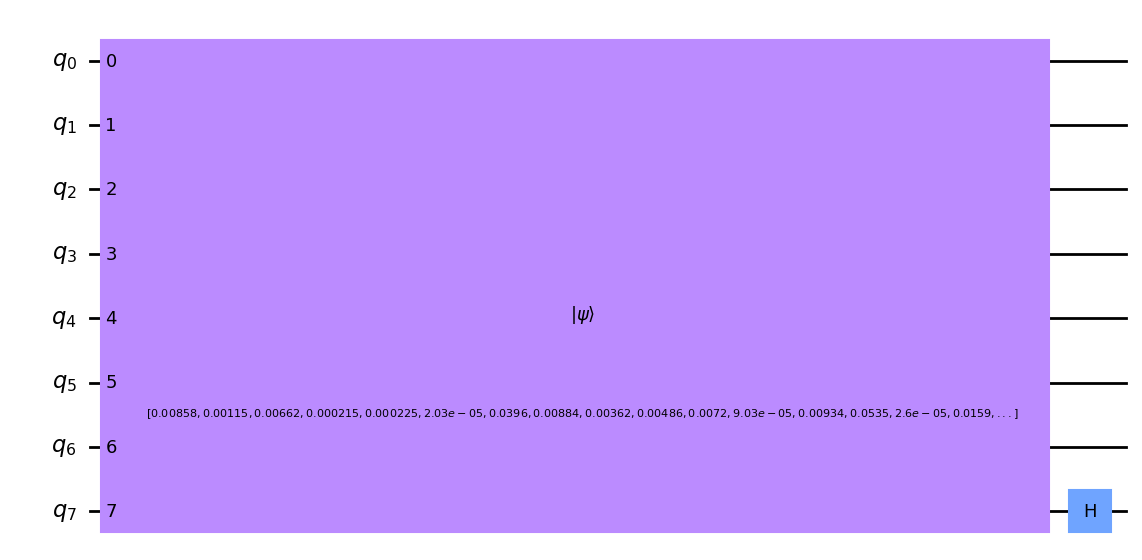

In [76]:
x = corona_cases_per_day.Confirmed.head(128)   # define some vectors x and y
y = corona_cases_per_day.Deaths.head(128)

N = len(x)  

nqubits = math.ceil(np.log2(N))    # compute how many qubits needed to encode either x or y
print(nqubits)
xnorm = np.linalg.norm(x)          # normalise vectors x and y
ynorm = np.linalg.norm(y)
x = x/xnorm
y = y/ynorm
print(xnorm,ynorm)

circ = QuantumCircuit(nqubits+1)   # create circuit
vec = np.concatenate((x,y))/np.sqrt(2)    # concatenate x and y as above, with renormalisation
print(circ,vec)

# # add gates to circuit
circ.initialize(vec, range(nqubits+1))
circ.h(nqubits)                    # apply hadamard to bottom qubit

circ.draw('mpl')                        # draw the circuit

In [77]:
#Creates a quantum circuit to calculate the inner product between two normalised vectors

def inner_prod(vec1, vec2):
    #first check lengths are equal
    if len(vec1) != len(vec2):
        raise ValueError('Lengths of states are not equal')
        
    circ = QuantumCircuit(nqubits+1)
    vec = np.concatenate((vec1,vec2))/np.sqrt(2)
    
    circ.initialize(vec, range(nqubits+1))
    circ.h(nqubits)

    backend = Aer.get_backend('statevector_simulator')
    job = execute(circ, backend)

    result = job.result()
    o = np.real(result.get_statevector(circ))
    m_sum = 0
    for l in range(N):
        m_sum += o[l]**2
        
    return 2*m_sum-1

x = corona_cases_per_day.Confirmed.head(128)   # define some vectors x and y
y = corona_cases_per_day.Deaths.head(128)

N = len(x)
nqubits = math.ceil(np.log2(N))
xnorm = np.linalg.norm(x)
ynorm = np.linalg.norm(y)
x = x/xnorm
y = y/ynorm

print("x: ", x)
print()
print("y: ", y)
print()
print("The inner product of x and y equals: ", inner_prod(x,y))

x:  0      0.012129
1      0.001632
2      0.009356
3      0.000303
4      0.000318
         ...   
123    0.000379
124    0.013774
125    0.003416
126    0.003054
127    0.025774
Name: Confirmed, Length: 128, dtype: float64

y:  0      0.010821
1      0.001228
2      0.009917
3      0.000443
4      0.000350
         ...   
123    0.000588
124    0.007334
125    0.003974
126    0.002175
127    0.003351
Name: Deaths, Length: 128, dtype: float64

The inner product of x and y equals:  0.8973309458794445


In [78]:
#Implements the entire cost function by feeding the ansatz to the quantum circuit which computes inner products

def calculate_cost_function(parameters):

    a, b = parameters
    
    ansatz = a*x + b                        # compute ansatz
    ansatzNorm = np.linalg.norm(ansatz)     # normalise ansatz
    ansatz = ansatz/ansatzNorm
    
    y_ansatz = ansatzNorm/ynorm * inner_prod(y,ansatz)     # use quantum circuit to test ansatz
    b0=(1-y_ansatz)**2                                                      # note the normalisation factors
    return (1-y_ansatz)**2

x = corona_cases_per_day.Confirmed.head(128)   # define some vectors x and y
y = corona_cases_per_day.Deaths.head(128)

N = len(x)
nqubits = math.ceil(np.log2(N))
ynorm = np.linalg.norm(y)
y = y/ynorm

a = 1.0
b = 1.0
print("Cost function for a =", a, "and b =", b, "equals:", calculate_cost_function([a,b]))#Implements the entire cost function by feeding the ansatz to the quantum circuit which computes inner products

def calculate_cost_function(parameters):

    a, b = parameters
    
    ansatz = a*x + b                        # compute ansatz
    ansatzNorm = np.linalg.norm(ansatz)     # normalise ansatz
    ansatz = ansatz/ansatzNorm
    
    y_ansatz = ansatzNorm/ynorm * inner_prod(y,ansatz)     # use quantum circuit to test ansatz
    b1=(1-y_ansatz)**2                                                    # note the normalisation factors
    return (1-y_ansatz)**2

x = corona_cases_per_day.Confirmed.head(128)   # define some vectors x and y
y = corona_cases_per_day.Recovered.head(128)

N = len(x)
nqubits = math.ceil(np.log2(N))
ynorm = np.linalg.norm(y)
y = y/ynorm

a = 1.0
b = 1.0
print("Cost function for a =", a, "and b =", b, "equals:", calculate_cost_function([a,b]))

Cost function for a = 1.0 and b = 1.0 equals: 478.62506201650905
Cost function for a = 1.0 and b = 1.0 equals: 0.13339294605089003


In [79]:
x = float(input('Input the no of Confirmed Cases : '))
y = b0 + float(b1 * x)
print('')
print('')
print("The predicted no of Death :")
print(round(y))

Input the no of Confirmed Cases :  1200




The predicted no of Death :
509


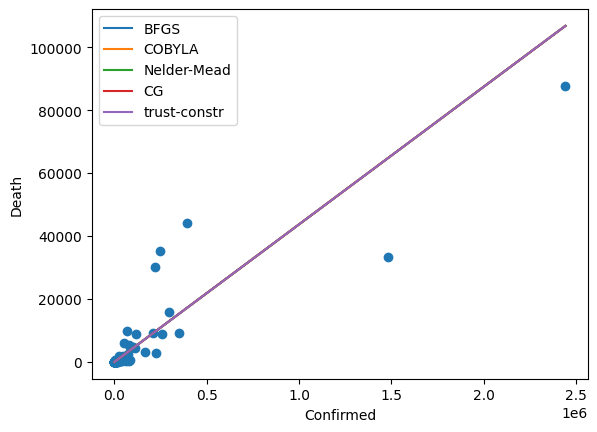

In [80]:
#first set up the data sets x and y

x = corona_cases_per_day.Confirmed.head(128)   # define some vectors x and y
y = corona_cases_per_day.Deaths.head(128) # + [random.uniform(-1,1) for p in range(8)]    # can add noise here
N = len(x)
nqubits = math.ceil(np.log2(N))
       
ynorm = np.linalg.norm(y)      # normalise the y data set
y = y/ynorm

x0 = [1.0,1.0]                 # initial guess for a and b

#now use different classical optimisers to see which one works best

out = minimize(calculate_cost_function, x0=x0, method="BFGS", options={'maxiter':200}, tol=1e-6)
out1 = minimize(calculate_cost_function, x0=x0, method="COBYLA", options={'maxiter':200}, tol=1e-6)
out2 = minimize(calculate_cost_function, x0=x0, method="Nelder-Mead", options={'maxiter':200}, tol=1e-6)
out3 = minimize(calculate_cost_function, x0=x0, method="CG", options={'maxiter':200}, tol=1e-6)
out4 = minimize(calculate_cost_function, x0=x0, method="trust-constr", options={'maxiter':200}, tol=1e-6)

out_a1 = out1['x'][0]
out_b1 = out1['x'][1]

out_a = out['x'][0]
out_b = out['x'][1]

out_a2 = out2['x'][0]
out_b2 = out2['x'][1]

out_a3 = out3['x'][0]
out_b3 = out3['x'][1]

out_a4 = out4['x'][0]
out_b4 = out4['x'][1]

plt.scatter(x,y*ynorm)
xfit = np.linspace(min(x), max(x), 100)
plt.plot(xfit, out_a*xfit+out_b, label='BFGS')
plt.plot(xfit, out_a1*xfit+out_b1, label='COBYLA')
plt.plot(xfit, out_a2*xfit+out_b2, label='Nelder-Mead')
plt.plot(xfit, out_a3*xfit+out_b3, label='CG')
plt.plot(xfit, out_a4*xfit+out_b4, label='trust-constr')
plt.legend()
# plt.title("y = x")
plt.xlabel("Confirmed")
plt.ylabel("Death")
plt.show()

In [81]:
# New cost function calculation, allowing for higher order polynomials
# Implements the entire cost function by feeding the ansatz to the quantum circuit which computes inner products
def calculate_cost_function_n(parameters):
    
    ansatz = parameters[0]                   # compute ansatz

    for i in range(1,len(parameters)):

        ansatz += parameters[i] * x**i
        
    ansatzNorm = np.linalg.norm(ansatz)      # normalise ansatz
    ansatz = ansatz/ansatzNorm
    y_ansatz = ansatzNorm/ynorm * inner_prod(y,ansatz)     # use quantum circuit to test ansatz
                                                           # note the normalisation factors

    return (1-y_ansatz)**2

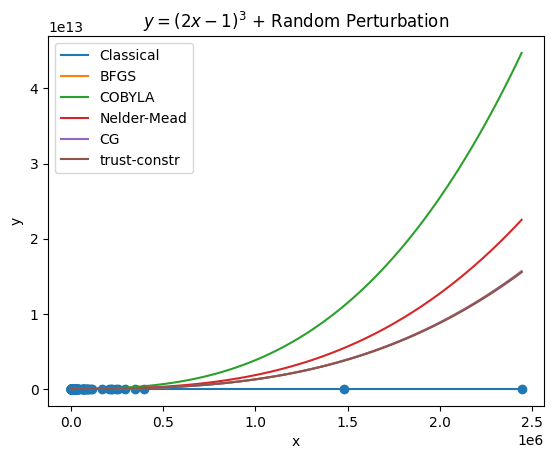

In [84]:
#first set up the data sets x and y

x = corona_cases_per_day.Confirmed.head(128) 
y = corona_cases_per_day.Deaths.head(128)
N = len(x)
nqubits = math.ceil(np.log2(N))
       
ynorm = np.linalg.norm(y)       #normalise y data set
y = y/ynorm

order = 3

x0 = [random.uniform(0,2) for p in range(order+1)]    #random initial guess for a and b

#now use different classical optimisers to see which one works best

out = minimize(calculate_cost_function_n, x0=x0, method="BFGS", options={'maxiter':200}, tol=1e-6)
out1 = minimize(calculate_cost_function_n, x0=x0, method="COBYLA", options={'maxiter':200}, tol=1e-6)
out2 = minimize(calculate_cost_function_n, x0=x0, method="Nelder-Mead", options={'maxiter':200}, tol=1e-6)
out3 = minimize(calculate_cost_function_n, x0=x0, method="CG", options={'maxiter':200}, tol=1e-6)
out4 = minimize(calculate_cost_function_n, x0=x0, method="trust-constr", options={'maxiter':200}, tol=1e-6)

class_fit = np.polyfit(x,y*ynorm,order)
class_fit = class_fit[::-1]

xfit = np.linspace(min(x), max(x), 100)

def return_fits(xfit):
    c_fit = np.zeros(100)
    q_fit = np.zeros(100)
    q_fit1 = np.zeros(100)
    q_fit2 = np.zeros(100)
    q_fit3 = np.zeros(100)
    q_fit4 = np.zeros(100)
    for i in range(order+1):
        c_fit += xfit**i*class_fit[i]
        q_fit += xfit**i*out['x'][i]
        q_fit1 += xfit**i*out1['x'][i]
        q_fit2 += xfit**i*out2['x'][i]
        q_fit3 += xfit**i*out3['x'][i]
        q_fit4 += xfit**i*out4['x'][i]
        

    return c_fit, q_fit, q_fit1, q_fit2, q_fit3, q_fit4

c_fit, q_fit, q_fit1, q_fit2, q_fit3, q_fit4 = return_fits(xfit)

plt.scatter(x,y*ynorm)
xfit = np.linspace(min(x), max(x), 100)
plt.plot(xfit, c_fit, label='Classical')
plt.plot(xfit, q_fit, label='BFGS')
plt.plot(xfit, q_fit1, label='COBYLA')
plt.plot(xfit, q_fit2, label='Nelder-Mead')
plt.plot(xfit, q_fit3, label='CG')
plt.plot(xfit, q_fit4, label='trust-constr')
plt.legend()
plt.title("$y = (2x-1)^3$ + Random Perturbation")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [85]:
X = corona_cases_per_day.Confirmed
Y = corona_cases_per_day.Deaths
# mean of our inputs and outputs
x_mean = np.mean(X)
y_mean = np.mean(Y)
#total number of values
n = len(X)
# using the formula to calculate the b1 and b0
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2
    
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)
#printing the coefficient
print('b0 value :')
print(b0)
print('')
print('b1 value :')
print(b1)


b0 value :
467.4036527025655

b1 value :
0.034381968549142834


In [86]:
x = float(input('Input the no of Confirmed Cases : '))
y = b0 + float(b1 * x)
print('')
print('')
print("The predicted no of Death :")
print(round(y))

Input the no of Confirmed Cases :  1200




The predicted no of Death :
509


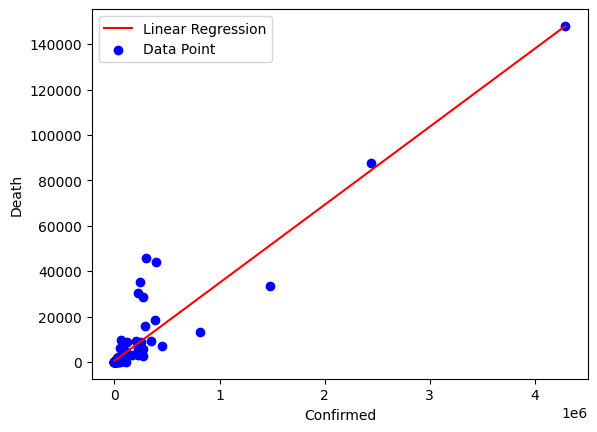

In [87]:
x_max = np.max(X) + 100
x_min = np.min(X) + 0
#calculating line values of x and y
x = np.linspace(x_min, x_max, 1000)
y = b0 + b1 * x
#plotting line 
plt.plot(x, y, color='red', label='Linear Regression')
#plot the data point
plt.scatter(X, Y, color='blue', label='Data Point')
# x-axis label
plt.xlabel('Confirmed')
#y-axis label
plt.ylabel('Death')
plt.legend()
plt.show()